# 限值因变量模型（续）
---

## 用于角点解响应的托宾模型

### 简介

另一类重要的限值因变量，在严格为正值时大致连续，但总体中有一个不可忽略的部分取值为$0$。例如个人在某给定月份用于喝酒方面的花费。

令$y$表示一个实际上在严格正值域上连续但以正概率取值$0$的变量，可以使用$y$的一个线性模型。但我们可能会得到负的拟合值，并且由于$y$的分布堆积在$0$处，显然不可能具有条件正态分布。

托宾模型用一个基本的潜变量来表示所观测到的响应$y$

$$y^{*} = \beta_{0} + x\beta + \mu, \mu|x \sim Normal(0,\sigma^{2}),y=max(0,y^{*})$$

### 对托宾估计值的解释

在托宾模型中

$$\begin{aligned} \mathrm{P}(y=0 | \mathbf{x}) &=\mathrm{P}\left(y^{*}<0 | \mathbf{x}\right)=\mathrm{P}(u<-\mathbf{x} \boldsymbol{\beta} | \mathbf{x}) \\ &=\mathrm{P}(u / \sigma<-\mathbf{x} \boldsymbol{\beta} / \sigma | \mathbf{x})=\Phi(-\mathbf{x} \boldsymbol{\beta} / \sigma)=1-\Phi(\mathbf{x} \boldsymbol{\beta} / \sigma) \end{aligned}$$

则无条件期望$\mathrm{E}(y | \mathbf{x})$可以写为

$$\mathrm{E}(y | \mathbf{x})=\mathrm{P}(y>0 | \mathbf{x}) \cdot \mathrm{E}(y | y>0, \mathbf{x})=\Phi(\mathbf{x} \boldsymbol{\beta} / \sigma) \cdot \mathrm{E}(y | y>0, \mathbf{x})$$

对于条件期望$\mathrm{E}(y | y>0, \mathbf{x})$，有

$$\mathrm{E}(y | y>0, \mathbf{x})=\mathbf{x} \boldsymbol{\beta}+\sigma \lambda(\mathbf{x} \boldsymbol{\beta} / \sigma)$$

其中，$\lambda(c)=\phi(c) / \Phi(c)$被称为反米尔斯比率；它是标准正态概率密度函数和标准正态累积分布函数在$c$处的值之比。

根据上述两个式子，可以得到

$$\mathrm{E}(y | \mathbf{x})=\Phi(\mathbf{x} \boldsymbol{\beta} / \sigma)[\mathbf{x} \boldsymbol{\beta}+\sigma \lambda(\mathbf{x} \boldsymbol{\beta} / \sigma)]=\Phi(\mathbf{x} \boldsymbol{\beta} / \sigma) \mathbf{x} \boldsymbol{\beta}+\sigma \phi(\mathbf{x} \boldsymbol{\beta} / \sigma)$$

计算偏效应，可以得到

$$\frac{\partial \mathrm{E}(y | \mathbf{x})}{\partial x_{j}}=\frac{\partial \mathrm{P}(y>0 | \mathbf{x})}{\partial x_{j}} \cdot \mathrm{E}(y | y>0, \mathbf{x})+\mathrm{P}(y>0 | \mathbf{x}) \cdot \frac{\partial \mathrm{E}(y | y>0, \mathbf{x})}{\partial x_{j}}$$

由于

$$\partial \mathrm{E}(y | y>0, \mathbf{x}) / \partial x_{j}=\beta_{j}\{1-\lambda(\mathbf{x} \boldsymbol{\beta} / \sigma)[\mathbf{x} \boldsymbol{\beta} / \sigma+\lambda(\mathbf{x} \boldsymbol{\beta} / \sigma)]\}$$

$$\frac{\partial P(y>0 | \mathbf{x})}{\partial x_{j}}=\left(\beta_{f} / \sigma\right) \phi(\mathbf{x} \beta / \sigma)$$

因此，最终的偏效应为

$$\frac{\partial \mathrm{E}(y | \mathbf{x})}{\partial x_{j}}=\beta_{j} \Phi(\mathbf{x} \boldsymbol{\beta} / \sigma)$$

<br>

**例子：已婚妇女的年度劳动供给**

In [1]:
import ipystata

In [2]:
%%stata

cd "D:\github\notebook\Teaching\Courses\Undergraduate\Econometrics\data"


D:\github\notebook\Teaching\Courses\Undergraduate\Econometrics\data




      hours |
    worked, |
       1975 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        325       95.59       95.59
         12 |          1        0.29       95.88
         15 |          2        0.59       96.47
         30 |          1        0.29       96.76
         44 |          1        0.29       97.06
         48 |          1        0.29       97.35
         50 |          1        0.29       97.65
         60 |          1        0.29       97.94
         63 |          1        0.29       98.24
         72 |          1        0.29       98.53
         75 |          1        0.29       98.82
         80 |          1        0.29       99.12
         90 |          2        0.59       99.71
         96 |          1        0.29      100.00
------------+-----------------------------------
      Total |        340      100.00

(bin=27, start=0, width=183.33333)



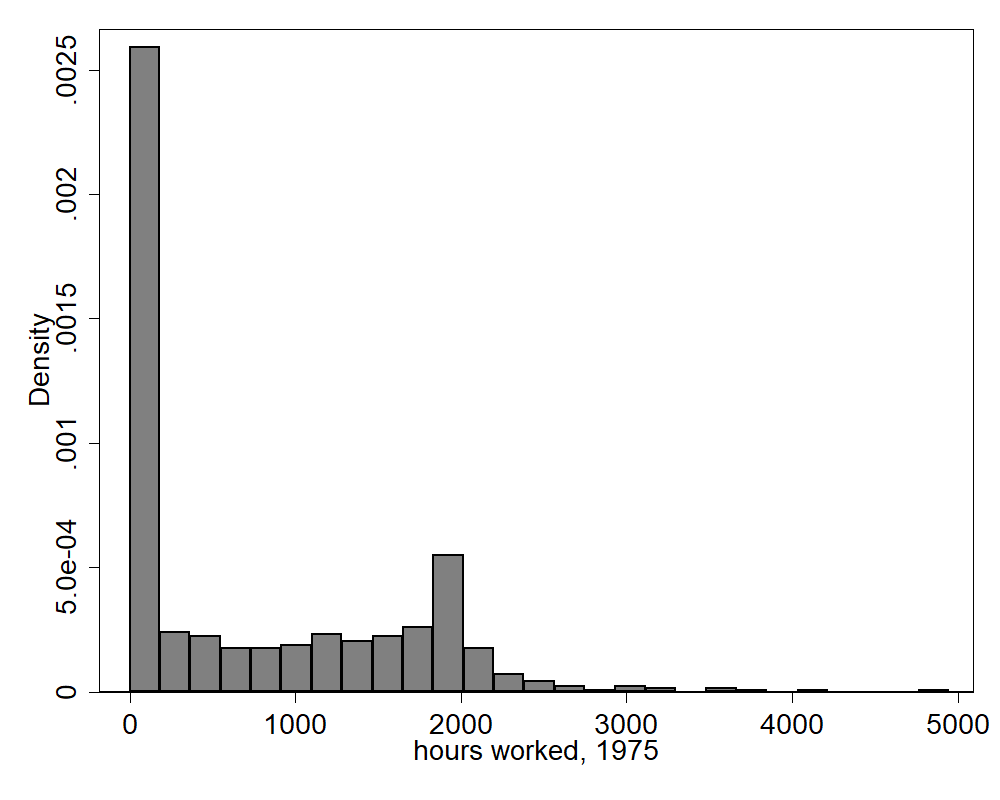

In [3]:
%%stata

use MROZ, clear
tab hours if hours < 100
hist hours

In [4]:
%%stata

eststo clear
eststo: quietly regress hours nwifeinc educ exper expersq age kidslt6 kidsge6
eststo: quietly tobit hours nwifeinc educ exper expersq age kidslt6 kidsge6, ll(0)
esttab, r2


(est1 stored)

(est2 stored)

--------------------------------------------
                      (1)             (2)   
                    hours           hours   
--------------------------------------------
main                                        
nwifeinc           -3.447          -8.814*  
                  (-1.35)         (-1.98)   

educ                28.76*          80.65***
                   (2.22)          (3.74)   

exper               65.67***        131.6***
                   (6.59)          (7.61)   

expersq            -0.700*         -1.864***
                  (-2.16)         (-3.47)   

age                -30.51***       -54.41***
                  (-6.99)         (-7.33)   

kidslt6            -442.1***       -894.0***
                  (-7.51)         (-7.99)   

kidsge6            -32.78          -16.22   
                  (-1.41)         (-0.42)   

_cons              1330.5***        965.3*  
                   (4.91)          (2.16)   
-----------------

In [5]:
%%stata

summ exper,meanonly
local exp2=r(mean)^2
mfx compute, at(mean expersq=`exp2') predict(ystar(0,.))


Marginal effects after tobit
      y  = E(hours*|hours>0) (predict, ystar(0,.))
         =  687.31745
------------------------------------------------------------------------------
variable |      dy/dx    Std. Err.     z    P>|z|  [    95% C.I.   ]      X
---------+--------------------------------------------------------------------
nwifeinc |  -5.687381     2.87788   -1.98   0.048  -11.3279 -.046835    20.129
    educ |   52.03649       13.82    3.77   0.000   24.9495  79.1234   12.2869
   exper |   84.89173      12.398    6.85   0.000   60.5929  109.191   10.6308
 expersq |  -1.202846      .36661   -3.28   0.001   -1.9214 -.484295   113.014
     age |  -35.10478     4.66947   -7.52   0.000  -44.2568 -25.9528   42.5378
 kidslt6 |  -576.8666       70.93   -8.13   0.000  -715.887 -437.847   .237716
 kidsge6 |  -10.46465       24.94   -0.42   0.675  -59.3456  38.4163   1.35325
------------------------------------------------------------------------------



<div align=center>
<img src="./pic/w022.jpg" width = "65%" />
</div>

## 泊松回归模型

对于非负因变量（计数变量），它可以取非负整数值。例如妇女曾生育的子女数。可以将期望值模型转化为一个指数函数

$$E(y|x_{1},x_{2},...x_{k}) = exp(\beta_{0} + \beta_{1}x_{1} + ... + \beta_{k}x_{k})$$

如果要解释模型的系数，可以将方程取对数，得到

$$log[E(y|x_{1},x_{2},...x_{k})] = \beta_{0} + \beta_{1}x_{1} + ... + \beta_{k}x_{k} $$

有

$$\% \Delta \mathrm{E}(y | \mathbf{x}) \approx\left(100 \beta_{j}\right) \Delta x_{j}$$

即给定$x_{j}$提高一个单位，$100\beta_{j}$大致表示了$\mathrm{E}(y | \mathbf{x})$变化的百分数。

由于计数变量不可能具有正态分布，令人满意的分布是泊松分布。于是以$x$为条件，$y$等于$h$的概率是

$$p(y=h|x) = exp[-exp(x\beta)][exp(x\beta)]^{h}/h!,h=0,1,...$$

在泊松分布里，方差等于均值，即

$$\operatorname{Var}(y | \mathbf{x})=\mathrm{E}(y | \mathbf{x})$$

这一点具有很大的局限性。幸运的是，泊松分布具有一个很好的稳健性质：不管泊松分布成立与否，我们仍能得到$\beta_{j}$的一致和渐近正态估计量。

当我们假定方差与均值成比例时，可对标准误进行简单调整。

$$\operatorname{Var}(y | \mathbf{x})=\sigma^{2} \mathrm{E}(y | \mathbf{x})$$

其中$\sigma^{2}$是未知参数，当$\sigma^{2}=1$时，我们就得到泊松方差假定。当$\sigma^{2}>1$时，方差比泊松情形的方差大，所以称为过度散布。

<br>

**例子：拘捕次数的泊松分布**

In [6]:
%%stata

use crime1, clear

eststo clear
eststo: quietly reg narr86 pcnv avgsen tottime ptime86 qemp86 inc86 black hispan born60
eststo: quietly poisson narr86 pcnv avgsen tottime ptime86 qemp86 inc86 black hispan born60
esttab, r2


(est1 stored)

(est2 stored)

--------------------------------------------
                      (1)             (2)   
                   narr86          narr86   
--------------------------------------------
main                                        
pcnv               -0.132**        -0.402***
                  (-3.26)         (-4.73)   

avgsen            -0.0113         -0.0238   
                  (-0.93)         (-1.19)   

tottime            0.0121          0.0245   
                   (1.28)          (1.66)   

ptime86           -0.0409***      -0.0986***
                  (-4.64)         (-4.76)   

qemp86            -0.0513***      -0.0380   
                  (-3.54)         (-1.31)   

inc86            -0.00146***     -0.00808***
                  (-4.26)         (-7.76)   

black               0.327***        0.661***
                   (7.20)          (8.95)   

hispan              0.194***        0.500***
                   (4.88)          (6.76)   

born60          

## 截取和断尾回归模型

- 典型的截取是因为调查设计，有时候也可能是因为制度上的约束。我们将数据截取问题与角点解结果分开处理，并用一个删截回归模型(censored regression model)来解决数据截取的问题。实质上，用一个删截回归模型解决的问题是响应变量$y$的数据缺失问题。

- 当我们在抽样方案中以$y$为依据排除了总体的一个子集时，就出现了断尾回归模型(truncated regression model)。

### 截取回归模型

截取正态回归模型

$$y_{i} = \beta_{0} + x_{i}\beta + u_{i},u_{i}|x_{i},c_{i} \sim Normal(0,\sigma^{2})$$

$$\omega_{i} = min(y_{i},c_{i})$$

例如受访者被问及其财富状况，通常允许他们回答“高于50万美元”。于是，我们可以观测到那些财富不足50万美元的受访者的实际财富，但是不能观测到那些财富高于50万美元的受访者的实际财富。

当OLS回归只利用截取的观测值时，就会产生不一致的估计量$\beta_{j}$，这和托宾模型类似，但是背后的问题相当不同。在托宾模型中，我们是为结果常常为0的经济行为建立模型；而在截取回归中，我们遇到的是数据选择问题。必须知道，在随机抽样的情况下，我们可以像在线性回归模型中那样解释$\beta_{j}$。删截回归模型的一个重要应用是持续期间分析(duration analysis)。

<br>

**例子：累犯的持续期间分析**

In [9]:
%%stata

use recid, clear


eststo clear
eststo: quietly reg ldurat workprg priors tserved felon alcohol drugs black married educ age
eststo: quietly cnreg ldurat workprg priors tserved felon alcohol drugs black married educ age, censored(cens)
esttab, r2


(est1 stored)

(est2 stored)

--------------------------------------------
                      (1)             (2)   
                   ldurat          ldurat   
--------------------------------------------
main                                        
workprg           0.00876         -0.0626   
                   (0.18)         (-0.52)   

priors            -0.0591***       -0.137***
                  (-6.44)         (-6.40)   

tserved          -0.00940***      -0.0193***
                  (-7.23)         (-6.49)   

felon               0.179**         0.444** 
                   (3.06)          (3.06)   

alcohol            -0.263***       -0.635***
                  (-4.39)         (-4.40)   

drugs             -0.0907          -0.298*  
                  (-1.65)         (-2.25)   

black              -0.179***       -0.543***
                  (-3.78)         (-4.62)   

married             0.134*          0.341*  
                   (2.43)          (2.44)   

educ            

### 断尾回归模型

在断尾回归中，我们会首先选取总体的一部分，然后再在其中选取样本。

断尾回归模型

$$y=\beta_{0}+\mathbf{x} \boldsymbol{\beta}+u, u | \mathbf{x} \sim \operatorname{Normal}\left(0, \sigma^{2}\right)$$

**豪斯曼和怀斯（1977）**

他们研究收入的各种决定因素，数据中一个家庭的收入必须低于$1967$年贫困线(贫困线取决于家庭规模)的$1.5$倍才会包括在研究中。

<div align=center>
<img src="./pic/w023.jpg" width = "65%" />
</div>

## 样本选择纠正

### OLS什么时候对选择样本是一致的？

一个总体模型

$$y_{i} = x_{i}\beta + \mu_{i}$$

如果处于某种原因，某个观测$i$的$y_{i}$或某些自变量不能观测到。为每个$i$定义一个选择指标$s_{i}$，若我们观测到$(y_{i},x_{i})$的全部，则$s_{i}=1$；否则$s_{i}=0$。显然，我们是估计方程

$$s_{i}y_{i} = s_{i}x_{i}\beta + s_{i}u_{u}$$

零相关假定可表述为

$$\mathrm{E}\left[\left(s x_{j}\right)(s u)\right]=\mathrm{E}\left(s x_{j} u\right)=0$$

因此，在总体中，我们需要$u$和$s x_{j}$无关。若$s_{i}$与$u_{i}$相关，那么选择样本的OLS不能一致地估计$\beta_{j}$。

### 从属断尾

通常处理从属断尾问题的方法是，我们在考虑的总体模型中添加一个明确的选择方程

$$\begin{array}{c}{y=\mathbf{x} \boldsymbol{\beta}+u, \mathrm{E}(u | \mathbf{x})=0} \\ {s=1[\mathbf{z} \gamma+v \geq 0]}\end{array}$$

若我们观测到$y$，则$s=1$，否则$s=0$。选择方程取决于可观测变量$z$和不可观测误差$v$。我们的一个标准假定是，$z$是外生的，即

$$\mathrm{E}(u | \mathbf{x}, \mathbf{z})=0$$

并且我们假定$x$严格地是$z$的一个子集。我们很容易看到，$u$和$v$之间的相关一般会导致导致样本选择问题。我们可以得到

$$\mathrm{E}(y | \mathbf{z}, v)=\mathbf{x} \boldsymbol{\beta}+\mathrm{E}(u | \mathbf{z}, v)=\mathbf{x} \boldsymbol{\beta}+\mathrm{E}(u | v)$$

如果$u$和$v$是联合正态的，那么就有$\mathrm{E}(u | v)=\rho v$。因此

$$\mathrm{E}(y | \mathbf{z}, v)=\mathbf{x} \boldsymbol{\beta}+\rho v$$

虽然我们没有观测到$v$，但我们可以利用这个方程计算$\mathrm{E}(y | \mathbf{z}, s)$，然后将它具体化到$s=1$。即

$$\mathrm{E}(y | \mathbf{z}, s)=\mathbf{x} \boldsymbol{\beta}+\rho \mathrm{E}(v | \mathbf{z}, s)$$

可以得到一个重要方程

$$\mathrm{E}(y | \mathbf{z}, s=1)=\mathbf{x} \beta+\rho \lambda(\mathbf{z} \gamma)$$

因此，$y$的期望值等于$x\beta$加上取决于反米尔斯比在$z\gamma$处的值。因此，如果用选择样本做OLS会省略一个通常与$x$相关的变量$\lambda(z\gamma)$。

由于$\gamma$未知，我们可以利用一个概率单位模型

$$\mathrm{P}(s=1 | \mathbf{z})=\Phi(\mathbf{z} \gamma)$$

来估计$\gamma$，然后在估计$\beta$。这个程序在计量经济学中被称为赫克曼方法（Heckit method）。

**样本选择纠正**

- 利用所有n个观测，估计一个$s_{i}$对$z_{i}$的概率单位模型，并得到估计值$\hat{\gamma}_{h}$。对每个$i$计算反米尔斯比$\hat{\lambda}_{i}=\lambda (z_{i}\hat{\gamma})$

- 利用选择样本，即$s_{i}=1$的观测，做如下回归：$y_{i}$对$x_{i}$和$\hat{\lambda}_{i}$回归，则$\hat{\beta}_{j}$就是一致的，并近似正态分布。

In [10]:
%%stata

use mroz, clear

reg lwage educ exper expersq
heckman lwage  educ exper expersq, sel(inlf = nwifeinc educ exper expersq age kidslt6 kidsge6) twostep


      Source |       SS           df       MS      Number of obs   =       428
-------------+----------------------------------   F(3, 424)       =     26.29
       Model |  35.0222967         3  11.6740989   Prob > F        =    0.0000
    Residual |  188.305144       424  .444115906   R-squared       =    0.1568
-------------+----------------------------------   Adj R-squared   =    0.1509
       Total |  223.327441       427  .523015084   Root MSE        =    .66642

------------------------------------------------------------------------------
       lwage |      Coef.   Std. Err.      t    P>|t|     [95% Conf. Interval]
-------------+----------------------------------------------------------------
        educ |   .1074896   .0141465     7.60   0.000     .0796837    .1352956
       exper |   .0415665   .0131752     3.15   0.002     .0156697    .0674633
     expersq |  -.0008112   .0003932    -2.06   0.040    -.0015841   -.0000382
       _cons |  -.5220406   .1986321    -2.63   0.